<a href="https://colab.research.google.com/github/N212002/Learngit/blob/main/btrnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [36]:
# Define your dataset directory
train_dir = '/content/drive/MyDrive/cleaned/cleaned/Training'


In [37]:
# Define image dimensions and batch size
img_height, img_width = 200, 200
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',  # Load images in grayscale mode
    class_mode='sparse')  # Assuming labels are provided as integers


Found 5090 images belonging to 4 classes.


In [39]:
# Reshape input data to remove the extra batch dimension
train_images, train_labels = next(train_generator)
train_images = np.squeeze(train_images, axis=3)  # Remove the last dimension

In [31]:
# Define the RNN-based image classifier model
def create_rnn_image_classifier(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.SimpleRNN(128, input_shape=input_shape))


    model.add(layers.Dense(num_classes, activation='softmax'))

    return model
input_shape = (img_height, img_width)  # Grayscale images have one channel
num_classes = len(train_generator.class_indices)

In [32]:

# Create the RNN-based image classifier model
model = create_rnn_image_classifier(input_shape, num_classes)



In [33]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               42112     
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 42628 (166.52 KB)
Trainable params: 42628 (166.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history = model.fit(train_images, train_labels, epochs=10)


Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [41]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



NameError: name 'history' is not defined

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 5090 images belonging to 4 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 128)               42112     
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 42628 (166.52 KB)
Trainable params: 42628 (166.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.5281 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 71ms/step - loss: 1.2013 - accuracy: 0.5625
Epoch 3/10
1/1 [==============================] - 0s 66ms/step - loss: 1.0551 - accuracy: 0.5938
Epoch 4/10
1/1 [==============================] - 0s 64ms/step - loss: 0.9430 - a

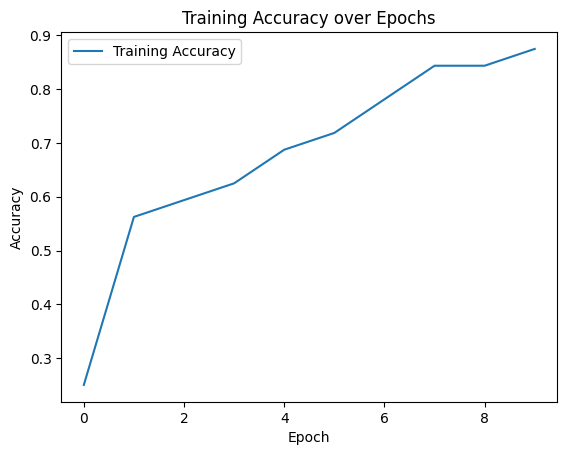

In [49]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define your dataset directory
train_dir = '/content/drive/MyDrive/cleaned/cleaned/Training'

# Define image dimensions and batch size
img_height, img_width = 200, 200
batch_size = 32

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',  # Load images in grayscale mode
    class_mode='sparse')  # Assuming labels are provided as integers

# Get the first batch of images and labels
train_images, train_labels = next(train_generator)
train_images = np.squeeze(train_images, axis=3)  # Remove the last dimension (channels)

# Define the RNN-based image classifier model
def create_rnn_image_classifier(input_shape, num_classes):
    model = models.Sequential()

    # Define the RNN layer
    model.add(layers.SimpleRNN(128, input_shape=input_shape))

    # Add a dense layer with softmax activation for classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

input_shape = (img_height, img_width)  # Grayscale images have one channel
num_classes = len(train_generator.class_indices)

# Create the RNN-based image classifier model
model = create_rnn_image_classifier(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model using the first batch of data
history = model.fit(train_images, train_labels, epochs=10)

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()
